In [1]:
#!pip install tensorflow

In [2]:
#pip install --upgrade keras
#!pip install --upgrade openpyxl>=3.1.0

In [3]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_excel("energy.xlsx")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [5]:
df.rename(columns={"AT":"Temperature","V":"Vaccum","AP":"Pressure","RH":"Humidity","PE":"Energy"},inplace=True)
df

,Temperature,Vaccum,Pressure,Humidity,Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  9568 non-null   float64
 1   Vaccum       9568 non-null   float64
 2   Pressure     9568 non-null   float64
 3   Humidity     9568 non-null   float64
 4   Energy       9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.isnull().sum()

Temperature    0
Vaccum         0
Pressure       0
Humidity       0
Energy         0
dtype: int64

In [8]:
df.skew()

Temperature   -0.136393
Vaccum         0.198521
Pressure       0.265445
Humidity      -0.431839
Energy         0.306509
dtype: float64

In [9]:
x = df.drop("Energy",axis=1)
y = df["Energy"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state =0)

# Modelling... working with raw model / base line model
- if only done simple cleaning and simple wrangling

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
ypred_train = model.predict(x_train)

from sklearn.metrics import mean_squared_error,r2_score
#print("train_RMSE ",np.sqrt(mean_squared_error(y_train,ypred_train)))

print("train_R2 ",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
#print("cv_score ",cross_val_score(model,x_train,y_train,cv=5).mean())

ypred_test = model.predict(x_test)

#print("Test RMSE",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2 ",r2_score(y_test,ypred_test))

train_R2  0.9277253998587902
Test R2  0.9325315554761302


# DL algorithms...ANN
- Design a perceptron
- Design a neuron network (<=2 Hidden layers)
- Design a deep neuron network (>2 Hidden layers)
#(keras is the part of tensorflow)

In [13]:
# 1) Perceptron model (i/p directly connect with the o/p)
import tensorflow as tf
import keras

from keras.models import Sequential
perceptron_model = Sequential()
#sequencial means ony by one..

from keras.layers import Dense
# Dense means connections...

perceptron_model.add(Dense(input_dim=4,units=1,activation='relu',kernel_initializer='uniform'))

# add means adding to perceptron model with connection
# input_dim means input variables, units=1 means next layer having one neuron, 
# units as hidden layer also,if another units mentioned...leads to form a another layer(hidden)
# max hidden units/neurons are  ( 2 x inputs - 1 ),
# if overfitting problem occured...decrease one after one neuron from hidden layer 
# we r not creating another layer,that one neuron ats as  o/p
# activation means activation function like sigmoid in logistic regression
# kernel_initializer means weights initializations...randomly choosen weights b/t uniform function range

perceptron_model.compile(optimizer = 'adam',loss = 'mean_squared_error')

# compile means checking error...
# 'adam' means gradient descend, means gradually decreasing the error method
# loss means ERROR, which error, MSE 

C:\Users\rames\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# fit on train data 

perceptron_model.fit(x_train, y_train, batch_size = 32, epochs = 100)
# so batch size and epochs is not fixed...trail and error
# we hv to divide(batch_size) the total data into parts like horse story, check in notes
# epochs=100 means update the weights and check MSE 100 times, again & again till u get the least error

# prediction
ypred_train = perceptron_model.predict(x_train)
ypred_test = perceptron_model.predict(x_test)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 207029.2656
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206802.6406
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 206831.3281
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206658.1250
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206577.4219
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206715.8125
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206638.7500
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 206874.2656
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206687.8281
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206650.2188
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206443.8750
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206822.2812
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206670.0625
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [15]:
from sklearn.metrics import r2_score
print("train_R2 ",r2_score(y_train,ypred_train))
print("Test R2 ",r2_score(y_test,ypred_test))

train_R2  -709.4346896836322
Test R2  -706.6018862651368


In [16]:
# 2) ANN Algorithm ~ neural network means <=2 hidden layers

In [17]:
from keras.models import Sequential 
ann_model = Sequential()

from keras.layers import Dense

# adding input layer and one hidden layer
ann_model.add(Dense(input_dim = 4,units = 6, activation='relu',kernel_initializer = 'uniform'))

# adding second hidden layer
ann_model.add(Dense(units = 6, activation = 'relu', kernel_initializer = 'uniform'))

# adding output layer
ann_model.add(Dense(units = 1, activation = 'relu', kernel_initializer = 'uniform'))

# checking error
ann_model.compile(optimizer = 'adam',loss = 'mean_squared_error')

C:\Users\rames\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# fit on train data
ann_model.fit(x_train, y_train, batch_size = 32, epochs = 100)

# prediction
ypred_train = ann_model.predict(x_train)
ypred_test = ann_model.predict(x_test)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 206567.8594
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 206568.7969
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 207002.7969
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206624.7344
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206582.0625
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206667.4219
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 206834.6250
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206293.2969
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206785.3906
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206672.6094
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206868.8438
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206559.4844
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206623.1875
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [19]:
from sklearn.metrics import r2_score
print("train_R2 ",r2_score(y_train,ypred_train))
print("Test R2 ",r2_score(y_test,ypred_test))

train_R2  -709.4346896836322
Test R2  -706.6018862651368


In [20]:
# independent of variables...for that apply f _test/ anova test 

from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=0)

import statsmodels.formula.api as smf
model3=smf.ols("y_train~x_train",data=df_train).fit() # ~ means verses
model3.summary()
#df_train.count() / shape

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.455e+04
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:02:09   Log-Likelihood:                -22517.
No. Observations:                7654   AIC:                         4.504e+04
Df Residuals:                    7649   BIC:                         4.508e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    452.8410     10.963     41.307      0.000     431.351     474.331
x_train[0]    -1.9731      0.017   -114.394      0.000      -2.007      -1.939
x_train[1]    -0.2365      0.008    -28.917      0.000      -0.253      -0.220
x_train[2]     0.0639      0.011      6.005      0.000       0.043       0.085
x_train[3]    -0.1581      0.005    -33.684      0.000      -0.167      -0.149
==============================================================================
Omnibus:                      827.729   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4159.582
Skew:                          -0.408   Prob(JB):                         0.00
Kurtosis:                       6.518   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

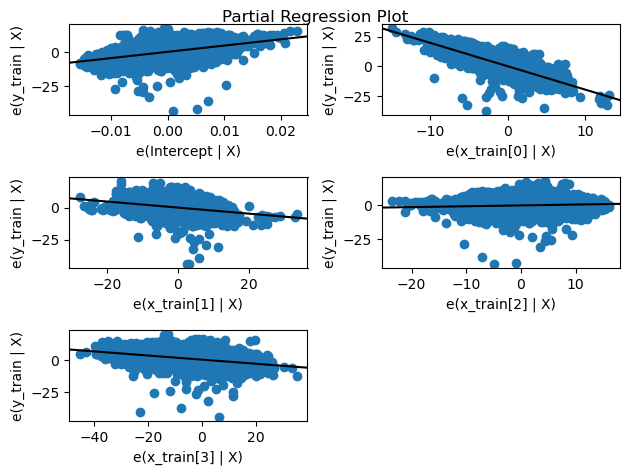

In [21]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model3)
plt.show()